In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
print(data["Cabin"].value_counts())


B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
              ..
C110           1
B79            1
B39            1
D10 D12        1
A32            1
Name: Cabin, Length: 147, dtype: int64


In [83]:
x = pd.get_dummies(data["Sex"])
data=data.drop("Sex", axis = 1) 
data=data.join(x)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [84]:
y = pd.get_dummies(data["Embarked"])
data=data.drop("Embarked", axis = 1) 
data=data.join(y) 


In [85]:
data['Age'].fillna(data['Age'].mean(),inplace=True)


In [86]:
data.drop('Name', 1)
data=data.drop('Cabin', 1)

In [87]:
Title=[]
for i in data['Name'] :
    pos1 = i.find(',') 
    pos2 = i.find('.')
    sousChaine = i[pos1+2:pos2]
    Title.append(sousChaine)

In [88]:
data.insert(1,'t',Title)

In [89]:
familyMembers = data["SibSp"]+data["Parch"]
data=data.drop("SibSp", axis = 1)
data=data.drop("Parch", axis = 1)
data.insert(5, value = familyMembers, column = "Family members")

In [90]:
titlesDictionnary = {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer",
                    "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty", 
                    "Lady" :"Royalty", "the Countess":"Royalty", "Dona":"Royalty",
                    "Mme":"Mme", "Mlle":"Mme", "Miss" :"Miss", "Ms":"Mme", "Mr":"Mr", "Mrs":"Mrs", "Master":"Master"}


In [91]:
data["t"]=data['t'].map(titlesDictionnary)


In [92]:
data.columns
data.head()
data.to_csv(r'Name.csv')

# Apply logistic regression. 

In [93]:
X = data[['PassengerId',  'Pclass', 'Family members',
       'Age', 'Fare', 'female', 'male', 'C', 'Q', 'S']]
y = data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 , random_state=40)

In [94]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(X_test)
print(y_pred)
print ('accuracy = { :.2f}',format(logreg.score(X_test,y_test)))

     PassengerId  Pclass  Family members   Age      Fare  female  male  C  Q  \
246          247       3               0  25.0    7.7750       1     0  0  0   
588          589       3               0  22.0    8.0500       0     1  0  0   
472          473       2               3  33.0   27.7500       1     0  0  0   
71            72       3               7  16.0   46.9000       1     0  0  0   
654          655       3               0  18.0    6.7500       1     0  0  1   
..           ...     ...             ...   ...       ...     ...   ... .. ..   
702          703       3               1  18.0   14.4542       1     0  1  0   
337          338       1               0  41.0  134.5000       1     0  1  0   
762          763       3               0  20.0    7.2292       0     1  1  0   
614          615       3               0  35.0    8.0500       0     1  0  0   
801          802       2               2  31.0   26.2500       1     0  0  0   

     S  
246  1  
588  1  
472  1  
71 

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
new_data=data

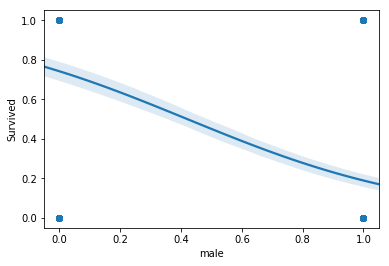

In [105]:
sns.regplot(x='male',y='Survived',data=new_data,logistic=True)

# confusion matrix to validate your model

In [38]:
confusion_matrix = pd.crosstab (y_test ,y_pred,rownames = ['actual'],colnames=['predicted'])
print(confusion_matrix)

predicted    0   1
actual            
0          128  28
1           25  87
